In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
imgpath = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\Patched\205811.tiff'
frame1 = cv2.imread(imgpath)

frame1.shape

(256, 256, 3)

In [3]:
hist, bins = np.histogram(frame1.ravel(), 256, [0, 256])

<BarContainer object of 256 artists>

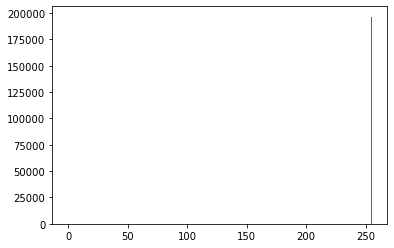

In [5]:
plt.bar(bins[:-1],hist)

In [23]:
folder = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\Patched'
white_folder = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\White_patches'
all_imgs = os.listdir(folder)
len(all_imgs)

330048

In [ ]:
for img in all_imgs:
    imgpath = os.path.join(folder,img)
    frame1 = cv2.imread(imgpath)
    hist, bins = np.histogram(frame1.ravel(), 256, [0, 256])
    rate = (hist[255]/(256*256))*100
    if rate > 90:
        print('this patch is white!') #remove white patches
        shutil.move(imgpath, os.path.join(white_folder,img))

In [27]:
print("total white patches is",(330048-len(os.listdir(folder))))

total white patches is 216130


In [ ]:
## Second Attempt 254

<BarContainer object of 256 artists>

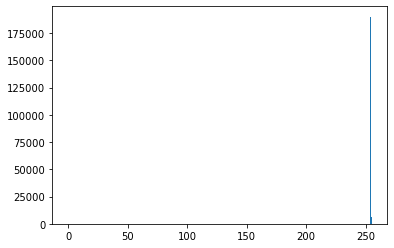

In [28]:
imgpath = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\Patched\344.tiff'
frame1 = cv2.imread(imgpath)
hist, bins = np.histogram(frame1.ravel(), 256, [0, 256])
plt.bar(bins[:-1],hist)

In [30]:
hist[254]

190011

In [51]:
folder = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\Patched'
white_folder = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\White_patches'
all_imgs = os.listdir(folder)
len(all_imgs)

113658

In [52]:
for i in tqdm(range(len(all_imgs))):
    img = all_imgs[i]
    imgpath = os.path.join(folder,img)
    frame1 = cv2.imread(imgpath)
    hist, bins = np.histogram(frame1.ravel(), 256, [0, 256])
    rate = (hist[254]/(256*256))*100
    if rate > 90:
        #print('this patch is white!') #remove white patches
        shutil.move(imgpath, os.path.join(white_folder,img))

100%|██████████████████████████████████████████████████████████████████████████| 113658/113658 [29:16<00:00, 64.69it/s]


In [ ]:
## Third Attempt 254

<BarContainer object of 256 artists>

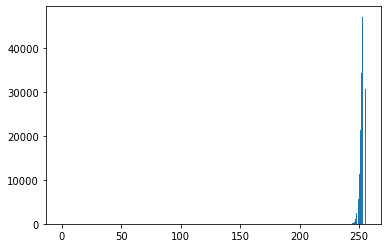

In [60]:
imgpath = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\Patched\199038.tiff'
frame1 = cv2.imread(imgpath)
hist, bins = np.histogram(frame1.ravel(), 256, [0, 256])
plt.bar(bins[:-1],hist)

In [61]:
hist[253]

47106

In [65]:
folder = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\Patched'
white_folder = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\White_patches'
all_imgs = os.listdir(folder)
len(all_imgs)

108080

In [66]:
for i in tqdm(range(len(all_imgs))):
    img = all_imgs[i]
    imgpath = os.path.join(folder,img)
    frame1 = cv2.imread(imgpath)
    hist, bins = np.histogram(frame1.ravel(), 256, [0, 256])
    
    rate = (hist[253]/(256*256))*100
    if rate > 90:
        shutil.move(imgpath, os.path.join(white_folder,img))
        continue
    
    rate = (hist[252]/(256*256))*100
    if rate > 90:
        shutil.move(imgpath, os.path.join(white_folder,img))
        continue
    
    rate = (hist[251]/(256*256))*100
    if rate > 90:
        shutil.move(imgpath, os.path.join(white_folder,img))
        continue
    rate = (hist[250]/(256*256))*100
    if rate > 90:
        shutil.move(imgpath, os.path.join(white_folder,img))
        continue

100%|█████████████████████████████████████████████████████████████████████████| 108080/108080 [12:49<00:00, 140.39it/s]


In [ ]:
# Old code Below

In [10]:
imgpath = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\5.tiff'
frame1 = cv2.imread(imgpath)


In [11]:
frame1.shape

(32768, 32768, 3)

In [1]:
import cv2
import os
import numpy as np
from tqdm import tqdm

def cropimg(patch,step, imgpath,save_path,img_nmm):
    "patch: the cropped patch size, default:128; step: cropping gap, default:128"
    frame1 = cv2.imread(imgpath)
    W = frame1.shape[1]
    H = frame1.shape[0]
    for i in range(0, H - patch, step):
        for j in range(0, W - patch, step):
            img_nm = os.path.splitext(imgpath)[0]
            
            cropImg1 = frame1[j:j + patch, i:i + patch]
            hist, bins = np.histogram(cropImg1.ravel(), 256, [0, 256])
            rate = (hist[255]/(patch*patch))*100
            if rate > 90:
                #print('this patch is white!') #remove black patches
                pass
            else:
                if not os.path.exists(save_path):
                    os.makedirs(save_path)
                cv2.imwrite(save_path + '/' + img_nmm + '_' + str(i) + '_' + str(j) + '.jpg', cropImg1)
                print(save_path + '/' + img_nmm + '_' + str(i) + '_' + str(j) + '.jpg')


In [ ]:
source_path = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info" 
save_path = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Patches"  
#save_path = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\white_patches"
file_names = os.listdir(source_path)

for i in tqdm(range(len(file_names))):
    full_path = os.path.join(source_path,file_names[i])
    print(full_path)
    x = cropimg(256, 256, full_path, save_path, file_names[i])
#     print("crop", file_names[i])
#     print("crop_nums", i)

print("cropping over!")

In [9]:
#KEeping track of all white patches to move them if need
items = os.listdir(r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\white_patches")
fn= r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\list_white_patches.txt"
file = open(fn,'w')
for item in items:
    file.write(item+"\n")
file.close()

## Re-attach

In [2]:
from glob import glob

In [3]:
root = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Patches"
files = sorted(glob(os.path.join(root, "*5.*")))

In [4]:
imgpath = r'C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\5.tiff'
frame1 = cv2.imread(imgpath)
original_shape = frame1.shape
print(original_shape)

(32768, 32768, 3)


In [ ]:
# last file 5.tiff_32256_32256

In [5]:
frame1 = np.zeros((32512,32512,3))
print(frame1.shape)

(32512, 32512, 3)


In [9]:
from patchify import patchify, unpatchify
patches = patchify(frame1,(256,256,3),step=256) 
patches = np.squeeze(patches)
print(patches.shape)

(127, 127, 256, 256, 3)


In [ ]:
for n in range(len(files)):
    for i in range(0,32257,256):
        for j in range(0,32257,256):
            print(str(i),str(j))
            #path = os.path.join(root,'5.tiff_{}_{}'.format(str(i),str(j)))
            print(path)


In [ ]:
unpatch = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH"

end = int(32256/256) +1
print(end)


for i in range(0,end,1):
    for j in range(0,end,1):
        adjusted_i = i*256
        adjusted_j = j*256
        path = os.path.join(root,'5.tiff_{}_{}.jpg'.format(str(adjusted_i),str(adjusted_j)))
        #print(path)
        single_patch_img = cv2.imread(path)
        if single_patch_img is None:
            raise Exception("Could not read the image") 
        #frame1[adjusted_i:(adjusted_i+256),adjusted_j:(adjusted_j+256)] = single_patch_img.copy()
        frame1[adjusted_j:(adjusted_j+256),adjusted_i:(adjusted_i+256)] = single_patch_img.copy()
        

print(frame1.shape)
name = os.path.join(unpatch, '5.tiff.jpg')
cv2.imwrite(name, frame1)

In [13]:
name = os.path.join(unpatch, '5.tiff.jpg')
cv2.imwrite(name, frame1)

True

# Re-paint on top 

In [3]:
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub) # use start += 1 to find overlapping matches

#list(find_all('spam spam spam spam', 'spam'))

filename = './trial_console.txt'

curr_list = []
total_avg = []
names = []
curr_name = ""

with open(filename) as file:
    for line in file:
        cur_line = line.rstrip()
        if(cur_line[0].isdigit()):
            curr_list.append(float(cur_line))
          # print(cur_line)
        else:
            if('tiff' in cur_line):
                start_stop =list(find_all(cur_line,"'"))
                start = start_stop[0] +1
                stop = start_stop[1]
                curr_name = cur_line[start:stop]
            if(len(curr_list)>0):
                total_avg.append(np.mean(curr_list))
                names.append(curr_name)
                curr_name = ""
            curr_list = []
          #print('clear',cur_line)

In [4]:
print(len(total_avg))
print(len(names))

16218
16218


In [8]:
names[1]

'10.tiff_26624_0'

In [24]:
glob_min = min(total_avg)
glob_max = max(total_avg)

def get_scale(loss_val):
    if loss_val <5:
        local_max = 5
        scale = (loss_val - glob_min)/(local_max- glob_min)
    elif loss_val <6:
        local_max = 6
        local_min = 5
        scale = (loss_val - local_min)/(local_max- local_min)
    else:
        local_min = 6
        scale = (loss_val - local_min)/(glob_max- local_min) 
    return scale

In [25]:
 #  OpenCV uses BGR
def get_color(loss_val):
    image = np.zeros((256, 256, 3), np.uint8)
    scale_intensity = get_scale(loss_val)
    if loss_val <5:
        image[:] = (0, 255*scale_intensity, 0) # GREEN
    elif loss_val <6:
        image[:] = (0, 0, 255*scale_intensity) # RED
    else:
        image[:] = (255*scale_intensity, 0, 0) # BLUE
    
    return image

In [30]:
source_path = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info" 
unpatch = r"C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH"

files = os.listdir(source_path)
patch = 256
step = 256


for img_nmm in files:
    imgpath = os.path.join(source_path, img_nmm)
    print(imgpath)

    frame1 = cv2.imread(imgpath)
    W = frame1.shape[1]
    H = frame1.shape[0]
    for i in range(0, H - patch, step):
        for j in range(0, W - patch, step):
            img_nm = os.path.splitext(imgpath)[0]

            cropImg1 = frame1[j:j + patch, i:i + patch]
            #cv2.imwrite(save_path + '/' + img_nmm + '_' + str(i) + '_' + str(j) + '.jpg', cropImg1)
            curr_name_search = img_nmm + '_' + str(i) + '_' + str(j)
            if curr_name_search in names:
                idx = names.index(curr_name_search)
                avg = total_avg[idx]
                fill_patch = get_color(avg)
                frame1[j:j + patch, i:i + patch] = fill_patch
                #print(curr_name_search)

    name_save = os.path.join(unpatch, img_nmm +'.jpg')
    saved = cv2.imwrite(name_save, frame1)
    print(saved, name_save)


C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\10.tiff
True C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH\10.tiff.jpg
C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\11.tiff
True C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH\11.tiff.jpg
C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\5.tiff
True C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH\5.tiff.jpg
C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\7.tiff
True C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH\7.tiff.jpg
C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\8.tiff
True C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH\8.tiff.jpg
C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\Info\9.tiff
True C:\Users\Tasli\Desktop\Python_Folder_New\CVPRIMAGES\WSI\BIG_PATCH\UNPATCH